# CS 237 Fall 2019   Homework Six

### Due date: PDF file due Friday October 17th @ 11:59PM in GradeScope with 6-hour grace period

### No late deadline beyond Friday

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

Problems 1 through 11 involve the Bernoulli, Binomial, Geometric and/or Negative Binomail Distributions. Problem 12 is a simulation of a card game called "Twenty-One." 

Feel free to calculate the solutions using Python but don't import any libraries specifically about these distributions, rather, write your own versions of the formulae given in the Distributions Notebook. 




In [1]:
# Here are some imports which will be used in code that we write for CS 237
 

# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi       # import whatever you want from math
from random import seed, random, randint
from scipy.special import comb
from collections import Counter

%matplotlib inline

# Calculating permutations and combinations efficiently

def P(N,K):
    res = 1
    for i in range(K):
        res *= N
        N = N - 1
    return res
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Useful code 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.

def draw_distribution(Rx, fx, title='Probability Distribution for X'):
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
def round4(x):
    return round(x+0.0000001,4)

def round4_list(L):
    return [ round4(x) for x in L]


In [2]:
# my code from hw5

def Bino(N,p,k): # k amount of heads
    a = (C(N,k) * (p**k)) * ((1-p)**(N-k))
    return a
    

## Problem One

 A restaurant serves 8 fish entrees, 12 beef, and 10 chicken. If customers select from these entrees randomly and independently, and the kitchen has plenty of each entree (so this is "with replacement"), what is the probability

(a) that at least 4 of the next 10 customers order beef?

(b) that between 2 and 6 (inclusive) of the next 20 customers order fish?

(c) that of the next 10 customers, at most 1 of the first 5 orders chicken, and at least 2 of the last 5 orders beef. 

(d) that of the next 5 customers, the first orders chicken, the second orders fish, and of the remaining 3, at least 2 order beef?

Hint: For (c) and (d) remember that all customers choose their meal independently. 



In [16]:
a = 1 - (Bino(10,12/30,0) + Bino(10,12/30,1) + Bino(10,12/30,2) + Bino(10,12/30,3))
round4(a)

0.6177

In [4]:
b = Bino(20,8/30,2) + Bino(20,8/30,3) + Bino(20,8/30,4) + Bino(20,8/30,5) + Bino(20,8/30,6)
round4(b)

0.7139

In [5]:
c = (Bino(5,10/30,0) + Bino(5,10/30,1)) * (1 - (Bino(5,12/30,0) + Bino(5,12/30,1)))
round4(c)


0.3056

In [6]:
d = Bino(1,10/30,1) * Bino(1,8/30,1) * ((Bino(3,12/30,2) + Bino(3,12/30,3)))
round4(d)

0.0313

**Solution:** 

a) (10,12/30,(3,2,1,0))


1 - ((C(10,0) * (12/30)^0 * (18/30)^10) + (C(10,1) * (12/30)^1 * (18/30)^9) + (C(10,2) * (12/30)^2 * (18/30)^8) + (C(10,3) * (12/30)^3 * (18/30)^7)) = 0.6177

b)

Bino(20,8/30,2) + Bino(20,8/30,3) + Bino(20,8/30,4) + Bino(20,8/30,5) + Bino(20,8/30,6) = 0.7139

c) 

(Bino(5,10/30,0) + Bino(5,10/30,1)) * (1 - (Bino(5,12/30,0) + Bino(5,12/30,1)))

0.3056

d)


Bino(1,10/30,1) * bino(1,8/30,1) * (bino(3,12/30,2) + bino(3,12/30,3)) = 0.0313

## Problem Two

Suppose we draw cards at random and with replacement from a standard deck of 52 cards successively until we draw an Ace.

(a) What is the probability that this occurs on the 5th draw?

(b) What is the probability that at least 10 draws are needed?

(c) What is the probability that between 3 and 7 draws (inclusive) are needed?


**Solution:** 

a) (1 - 4/52)^4 * 4/52 = 0.0558 (geometric)

b) (1 - 4/52)^9 * 4/52 = 0.0374  (geometric)

c) use geometric:

(1 - 4/52)^2 * 4/52 + (1 - 4/52)^3 * 4/52 + (1 - 4/52)^4 * 4/52 + (1 - 4/52)^5 * 4/52 + (1 - 4/52)^6 * 4/52 = 0.2810


## Problem Three

You are a quality-control expert evaluating the claim of a manufacturer of drone rotors that at most 3% of its rotors are defective.

(a) You take a random sample of 24 rotors  find that 2 of them are defective. Is it fair to reject the manufacturer's claim based on this observation?

(b) You take a random sample of 24 rotors and find that 4 of them are defective. Now is it fair to reject the manufacturer's claim based on this observation?

Hint: Be careful, this is NOT a question about the probability of exactly 2 or exactly 4 being defective. The manufacturer is (optimistically) claiming at most 3%, meaning more than 3% is not possible. But as a quality inspector you are a professional pessimist, so you want to consider, for K defective rotors, the probability P(X ≥ K). If this probability is small, then something unusual and alarming just happened and we have to reject the company's claim. 

<blockquote>
What is really being asked is the following. Suppose X = "the number of defective rotors in a shipment of N rotors, with the assumption that the probability of any individual rotor being defective is at most 0.03." Is this binomial distribution a reasonable model for the company's quality control efforts? When K rotors are found to be defective, what we are really asking is: "is this level of defective rotors, or worse, consistent with the model proposed by the company, where they said it is at most 3%"? So we are interested in the probability of P(X ≥ K). If this probability is very small, then something very, very unusual just happened when we tested the company's shipment, and we probably want to reject the claim. If the probability is not small, then the model may be reasonable. This paradigm is called "hypothesis testing" and it is essentially a probabalistic version of "proof by contradiction" (assume the claim is true, and then derive a contradiction, proving that the claim is false; here we prove that if the assumption leads to a conclusion with a very small probability, then the original assumption was probably not true).
</blockquote>


In [7]:
print("Problem a")
e = 1 - (Bino(24,0.03,0) + Bino(24,0.03,1))
round4(e)

Problem a


0.1612

In [8]:
print("Problem b")
f = 1 - (Bino(24,0.03,0) + Bino(24,0.03,1) + Bino(24,0.03,2) + Bino(24,0.03,3))
round4(f)

Problem b


0.0053

**Solution:** 

//1 - ((Bino(24,0.03,0) + Bino(24,0.03,1))//

a) 

1 - ((0.97^24) + C(24,1) * 0.03^1 * (0.97)^23) = 0.1612 = 16.12% >= 5% 

This argument seems valid because the assumpttion leads to a conclusion with not a small probability.

b)

1 - ((Bino(24,0.03,0) + Bino(24,0.03,1) + Bino(24,0.03,2) + (Bino(24,0.03,3))


(for b calculate bino of 4 or more)

1 - ((0.97 ^ 24) +  (C(24,1) * 0.03^1 * (0.97)^23) + (0.1271) + C(24,3) * 0.03^3 * (0.97)^21) = 0.0053164  <= 5%

However, this assumption has a conclusion with a very small probability. This means the original assumption was probably false.

## Problem Four

Suppose that in West Campus in September of 2019, out of 12 accidents that resulted in trips to Health Services or the emergency room, 4 happened on Friday the 13th. Is this a good reason for my GF Liz, who is very superstitious, to worry that next Friday, December the 13th, 2019, I am particularly in danger in my dorm room in Rich Hall?  Just for
the sake of this problem, let's pretend that December has only 30 days, so we can compare it with September. 



Hint: This is similar to the last one, but the model in question is that we know that 12 accidents occurred in September of 2019, and the probability that any one of them occured on Friday the 13th is the same as any other day, namely 1/30. Therefore the binomial model is X = "how many of the 12 accidents occurred on Friday the 13th?" You want to consider the likelihood of at least 4 accidents on that date.



**Solution:** 

//1 - (Bino(12,1/30,0) + Bino(12,1/30,1) + Bino(12,1/30,2) + Bino(12,1/30,3)) # same as 4 or more

1.0 - ((C(12,0) * (1/30)^0 * (29/30)^12) + (C(12,1)* (1/30)^1 * (29/30)^11) + (C(12,2)* (1/30)^2 * (29/30)^10) + (C(12,3) * (1/30)^3 * (29/30)^9)) = 0.0004927 

## Problem Five

Consider the simple error-detection scheme of parity checking, in which the sender appends to each 7-bit "message" an 8th bit to make the total number of 1's in the 8 bits an even number. The receiver checks the number of 1's in the 8-bit message and signals an error if this is an odd number. This works well for an odd number of errors, but fails to detect an even number of errors. (Google this if you are unclear about the algorithm.) Suppose that each bit is received correctly with probability 0.999, independently of the other bits. What is the probability that the receiver signals that a message has an error, but the error is NOT detected by the parity check?



 
 

**Solution:** 

what is the probability that a message has an error, but the the erorr is NOT detected by the parity check?

X = B(8,0.001)
P(K = even numbers)

Bino(8,0.001,2) + Bino(8,0.001,4) + Bino(8,0.001,6) + Bino(8,0.001,8) = 2.8 * 10^-5

In [9]:
Bino(8,0.001,2) + Bino(8,0.001,4) + Bino(8,0.001,6) + Bino(8,0.001,8)

2.78324891608675e-05

## Problem Six

Suppose that each day the price of a stock moves up 1/8th of a point with probability 1/3 and moves down 1/8th of the point with probability 2/3. If the price fluctuations from day to day are independent and identically distributed, what is the probability that after 6 days the stock has its original price?

Hint: you could draw a tree, but it is easier to answer the following question: how many moves up and how many moves down result in no change in the stock price after 3 days?

In [10]:
i = Bino(6,1/3,3)
round4(i)

0.2195

**Solution:** 

X - B(6,1/3,3)

P((X=3)

C(6,3) * (1/3)^3 * (2/3)^3 = 0.2195


## Problem Seven

(a) If you roll a die 5 times, what is the probability of 5 or 6 showing on the die in exactly 2 of the rolls?

(b) If two fair dice are rolled 10 times, what is the probability of at least one 6 (on either die) in exactly five of these 10 rolls?

**Solution:** 

Bino(N,p,k)

a)

Bino(5, 2/6 ,2) = C(5,2) * (2/6)^2 * (4/6)^3 = 0.3292

b)

Bino(10,11/36,5) = C(10,5) * (11/36)^5 * (25/36)^5 = 0.1084

## Problem Eight

Suppose a professor of probability is tired of reading the depressing news and so he decides that he will quickly scan the first 5 headlines in the New Yorks Times and the first 5 headlines in the Boston Globe and if at most 3 of the articles in each are depressing, he will read the news that day. Further suppose that the probability of a NYTs headline being depressing is 0.6 and for the Globe the probability of a headline being depressing is 0.55. 

(a) What is the probability that he will read the news the first day he tries this?

(b) In order to be "well-informed" he needs to read the news at least half the time; what is the probability that he will be well-informed after doing this for a week? 

Hint: This is another problem where there are two independent parts of the random experiment.
You might want to phrase it as three different random variables, all three being binomial.
 

**Solution:** 

a)

(Bino(5,0.55,0) + Bino(5,0.55,1) + Bino(5,0.55,2) + Bino(5,0.55,3)) * 
(Bino(5,0.6,0) + Bino(5,0.6,1) + Bino(5,0.6,2) + Bino(5,0.6,3) = 0.4932

b)

1 - (Bino(7,0.4932,3) + Bino(7,0.4932,2) + Bino(7,0.4932,1) + Bino(7,0.4932,0))

In [11]:
h = (Bino(5,0.55,0) + Bino(5,0.55,1) + Bino(5,0.55,2) + Bino(5,0.55,3)) * (Bino(5,0.6,0) + Bino(5,0.6,1) + Bino(5,0.6,2) + Bino(5,0.6,3))
round4(h)

0.4932

In [12]:
rar = 1 - (Bino(7,0.4932,3) + Bino(7,0.4932,2) + Bino(7,0.4932,1) + Bino(7,0.4932,0))
round4(rar)

0.4851

## Problem Nine

Suppose numbers in the range $[0..1)$ are randomly and independently selected
and rounded to 3 decimal places. Therefore we can assume that all possible combinations of 3 digits after the decimal point are equally likely. 

(a) What is the probability that the first selection is no more than 0.345?



(b) What is the probability that 0.345 occurs at least twice in the first 1000 selections?

(c) What is the probability that 0.345 is selected for the first time on the 1000th selection?

Hint: This problem uses all three of the distributions we have studied up to this point!

In [13]:
z = 1- (Bino(1000,1/1000,0) + Bino(1000,1/1000,1))
round4(z)

0.2642

**Solution:** 

a) 

346 numbers less than 0.345 and overall 1000 numbers. So probability is 0.346

b)

1 - (Bino(1000,1/1000,0) + Bino(1000,1/1000,1)) = 0.2642

c)

(1 - 1/1000)^999 * 0.001 = 0.0003681

## Problem Ten: 

Suppose Donald and Joe play a series of games, whose results are all independent of each other, but in which the probability that Joe wins any particular game is 0.6. Whoever wins 6 games wins the series. 

(a) What is the probability that (The) Donald wins after 8 games?

(b) What is the probability that the series comes down to a final game whose winner determines the winner of the series (analogous to a final, 7th game for the World Series)?

(c) If the series is in the seventh game, with (The) Donald at 4 games and Joe at 3, what is the probability that Joe "sweeps" by winning the next three games?

Hint: Use the Negative Binomial from the class lecture slides. Other ideas from last week might be helpful as well. 



**Solution**  

Joe = 0.6, Donald = 0.4

a) k = 8 r = 6

fx(8) = C(7,5) * 0.4^6 * (0.6)^2 = 0.03097


b) k = 11, r = 6

Jfx(6) + Dfx(6) = C(10,5)* 0.6^6 * (0.4)^5 + C(10,5) * 0.4^6 * (0.6)^5 = 0.2007

c) Bino(3,0.6,3) = (0.6)^3 = 0.216



## Problem Eleven:

A fair coin is flipped repeatedly. What is the probability that the fifth tail occurs before the 10th head?

Hint: Negative Binomial again! Phrase this as a problem "the 5th tail occurs on or before the kth flip" for an appropriate k.



**Solution:** 

C(5-1,4) * (1/2)^5 + C(6-1,4) * (1/2)^6 + ... + C(14-1,4)* (1/2)^14 = 0.9102


## Problem Twelve: What is the best strategy for the game of Twenty-One?
Now suppose we want to actually figure out the right way to gamble, using random variables and distributions.  We'll go back to dice....

We will play a version of blackjack called Twenty-One and figure out the best strategy for the game:

### Twenty One
This game is similar to the famous card game blackjack. We will play a one-player version of the game. The game is played for some number N of rounds (we will use N = 10,000), at the end of which the player wins points. The player accumulates points during the whole game, and the objective is, of course, to end up with the maximum number of points. 

The objective in each round of the game is to score as close to 21 as possible by rolling a die as many times as you wish and adding all the numbers that appear. When a player's total exceeds 21, he is 'busted' and gets 0 points. If the player chooses to stop rolling before he exceeds 21, then he wins whatever his total is at that point. So for example, if a player rolls 5, 2, 4, and then 6, his total at that point is 17, and he has to decide whether it is worth trying again: he will be busted if he gets 5 or more (since 17+5=22), but will get a better total if he gets 4 or less.  

There are many variations on this game, some involving multiple players, or a "banker" or different numbers of dice, or alcohol..... <a href="https://www.youtube.com/watch?v=G_IHHNjdIEk">here</a> is a short YT video explaining the basic game.

A computer can play this game with a suitable strategy. For this problem, we will consider a strategy to be simply an integer K which is the value at which you stop rolling (thinking that you are close enough to 21). The number K is fixed for the entire game. For example, if you set K = 19, then in every round, you will keep rolling if your sum to that point is less than 19; if you get a num &ge; 19 you stop. Clearly, any good strategy will be a number at least 15, since 15+6=21 and if you roll again at 15, you will never bust. But we will try all possible strategies. 

### The problem
You should write a function <code>playRound(K)</code> which rolls a single die until you reach or exceed K or get busted, and either return your score (if you reached or exceeded K), or 0 (if you were busted). Then write a function <code>playGame()</code> which calls <code>playRound(K)</code> for N = 10,000 times for each K and returns an array of 21 numbers giving the average payoff for each K = 1, ..., 21.

Your task is to answer the following questions: 

   - For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?

   - What is the best strategy for the game, meaning what value of K wins the most points on average?

Print out the values and an appropriate bar chart for the first question, and simply print out the answer to the second question using a print(...) function.

[4.015, 4.5561, 5.2107, 5.9459, 6.8208, 7.7912, 8.9097, 10.1642, 11.0896, 12.0008, 12.9458, 13.9344, 14.9843, 16.0317, 17.0528, 17.2339, 16.6304, 15.1535, 12.8492, 9.445, 5.1975]

16 is the best strategy because it has the most points on average


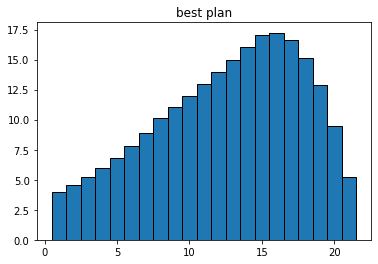

In [20]:
#Plays a single round of Twenty One with strategy K (flips the die until K is
#reached or the player busts) and returns the score.

# Hint: Use randint(...) to simulate the rolling of a die

def playRound(K):
    total = 0
    while (total < K):
        die_value = randint(1,7)
        total += die_value
        if (total >= 22):
            return 0
    return total


def playGame(t):
    total2 = 0
    ave = [0] * 21
    for i in range(1,22):
        for j in range(t):
            total2 += playRound(i)
        ave[i-1] = total2/t
        total2 = 0
    return ave

y_value = playGame(10000)
x_value = [i for i in range(1,22)]
plt.bar(x_value,y_value,width = 1.0, edgecolor = 'black')
plt.title("best plan")
print(y_value)
print()
print("16 is the best strategy because it has the most points on average")



# Your code here...